<a href="https://colab.research.google.com/github/Noha-Magdy/world-happiness-report-analysis/blob/main/Happiness_report_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report Analysis 
This project do data analysis techniques for world happiness report to discover the factors that have the highest contribution in the happiness level for each country. In addition to analyzing the effect of COVID19 in the happiness level


Analysis will be done on 2018 report and will be compared with 2020 report to see if COVID19 affected the happiness level

### Done by: 


*   Adel Emad - 1610509
*   Mohannad Ehab - 1610563
*   Noha Magdy - 1610126
 





### Needed libraries 

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.decomposition import PCA
from pandas.io.json import json_normalize
import json


## Data loading 

### Happiness report data

In [ ]:
data15=pd.read_csv("2015.csv")
data15.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
data16=pd.read_csv("2016.csv")
data16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
data17=pd.read_csv("2017.csv")
data17.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
data18 = pd.read_csv("2018.csv")
data18.head(5)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
data19 = pd.read_csv("2019.csv")
data19.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
data20 = pd.read_csv("2020.csv")
data20.head(5)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [ ]:
data20.columns 

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### COVID19 data

In [239]:
covid = pd.read_csv("covid-data.csv")

In [240]:
Covid = covid.groupby("location").sum()["new_cases"]

In [245]:
covid_final = pd.DataFrame({
    "country": Covid.index,
    "total_cases": Covid})

In [246]:
covid_final["total_cases"]

location
Afghanistan       53831.0
Albania           66635.0
Algeria          103381.0
Andorra            8946.0
Angola            18679.0
                  ...    
Vietnam            1536.0
World          93026789.0
Yemen              2111.0
Zambia            34278.0
Zimbabwe          26109.0
Name: total_cases, Length: 192, dtype: float64

### **Data Preparation**

In [ ]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
data15=data15.fillna(value=data15.mean()) ## for last column was 155 not 156

In [ ]:
data16=data16.fillna(value=data16.mean()) 

In [ ]:
data17=data17.fillna(value=data17.mean()) 

In [ ]:
data18=data18.fillna(value=data18.mean()) 

In [ ]:
data19=data19.fillna(value=data19.mean()) 

In [ ]:
data20=data20.fillna(value=data20.mean()) 

In [ ]:
# get the common columns between the data and remain them to be equal

# 2015 data 
data15_new = data15[['Country',  'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

data16_new = data16[['Country',  'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]


data17_new = data17[['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.']]

data17_new = data17_new.rename(columns = { 
                                       'Happiness.Score': 'Happiness Score',
                                        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                                        'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                                         'Trust..Government.Corruption.': 'Trust (Government Corruption)'})

data17_new = data17_new [['Country',  'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

data18_new = data18[['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

       
data18_new= data18_new.rename(columns = {
                                       'Score': 'Happiness Score',
                                       'GDP per capita': 'Economy (GDP per Capita)',
                                        'Healthy life expectancy': 'Health (Life Expectancy)',
                                         'Perceptions of corruption': 'Trust (Government Corruption)',
                                         'Country or region': 'Country',
                                        'Freedom to make life choices':'Freedom',
                                         'Social support': 'Family'})

data18_new= data18_new[['Country',  'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]


data19_new = data19[['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

data19_new = data19_new.rename(columns = {
                                       'Score': 'Happiness Score',
                                       'GDP per capita': 'Economy (GDP per Capita)',
                                        'Healthy life expectancy': 'Health (Life Expectancy)',
                                         'Perceptions of corruption': 'Trust (Government Corruption)',
                                         'Country or region': 'Country',
                                        'Freedom to make life choices':'Freedom',
                                         'Social support': 'Family'})


data19_new= data19_new[['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]


data20_new = data20[['Country name','Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']]


data20_new = data20_new.rename(columns = {'Country name': 'Country',
                                      'Explained by: Log GDP per capita': 'Economy (GDP per Capita)',
                                        'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',
                                        'Explained by: Perceptions of corruption': 'Trust (Government Corruption)',
                                        'Explained by: Freedom to make life choices':'Freedom',
                                         'Explained by: Social support': 'Family',
                                          'Explained by: Generosity': 'Generosity'})

data20_new = data20_new[['Country', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]




In [ ]:
# merge from 2015 to 2019

frames = [data15_new, data16_new, data17_new, data18_new, data19_new]
all_reports = pd.concat(frames)
all_reports.shape

(782, 8)

In [ ]:
all_reports.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

## Data Description  

In [ ]:
# Visualization of happiness score

fig = px.choropleth(happiness_report_18, locations='Country or region',
                    locationmode='country names',
                    color='Score',
                    hover_name='Country or region',
                    title='Happiness Index 2018',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

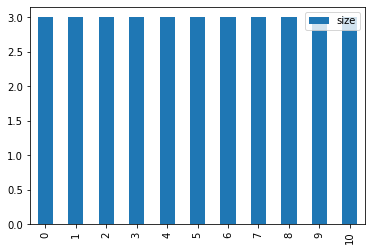

In [ ]:
## compare data of previous years 
topPrevCountries=[]
[topPrevCountries.append(i) for i in data15.Country[0:11]]
[topPrevCountries.append(i) for i in data16.Country[0:11]]
[topPrevCountries.append(i) for i in data17.Country[0:11]]

dfTest = pd.DataFrame({'freq': topPrevCountries})
dfTest.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

# This shows us that the top 10 countries were constant 15 - 17

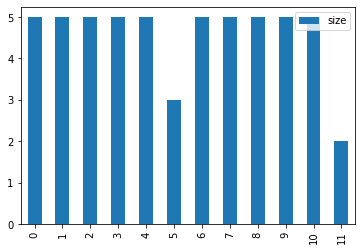

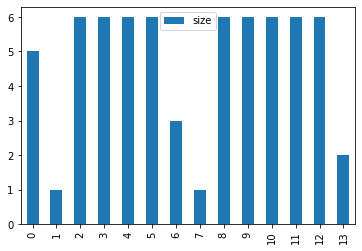

In [ ]:
[topPrevCountries.append(i) for i in happiness_report_18['Country or region'][0:11]]

dfTest1 = pd.DataFrame({'freq': topPrevCountries})
dfTest1.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

[topPrevCountries.append(i) for i in data20['Country name'][0:11]]

dfTest2 = pd.DataFrame({'freq': topPrevCountries})
dfTest2.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

In [ ]:
# in 2017=> unitedKindom was 19 place
# in 2018=> unitedKindom was 10 place 

temp1=data17[data17.Country=='United Kingdom']
temp2=happiness_report_18[happiness_report_18['Country or region']=='United Kingdom']
temp2.rename(columns={'Country or region':'Country','Freedom to make life choices':'Freedom', },inplace=True)
temp1.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita','Health..Life.Expectancy.':'Healthy life expectancy'},inplace=True)

DF = pd.concat([temp1,temp2])
DF

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,GDP per capita,Family,Healthy life expectancy,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,Social support,Perceptions of corruption
18,United Kingdom,19.0,6.714,6.783792,6.644209,1.441634,1.49646,0.805336,0.50819,0.492774,0.265428,1.704144,NaN,NaN,NaN,NaN
10,United Kingdom,NaN,NaN,NaN,NaN,1.244000,NaN,0.888000,0.46400,0.262000,NaN,NaN,11.0,7.19,1.433,0.082


In [ ]:
data15_new.describe()


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [ ]:
mean = []
maximum = []
minimum = []
index = []
data = [data15_new, data16_new, data17_new, data18_new, data19_new]
for i in range (len(data)):
  x = data[i].describe()
  mean.append(x['Happiness Score'].iloc[1])
  maximum.append(x['Happiness Score'].iloc[7])
  minimum.append(x['Happiness Score'].iloc[3])
  index.append(i+15)




Text(0, 0.5, 'max of happiness score')

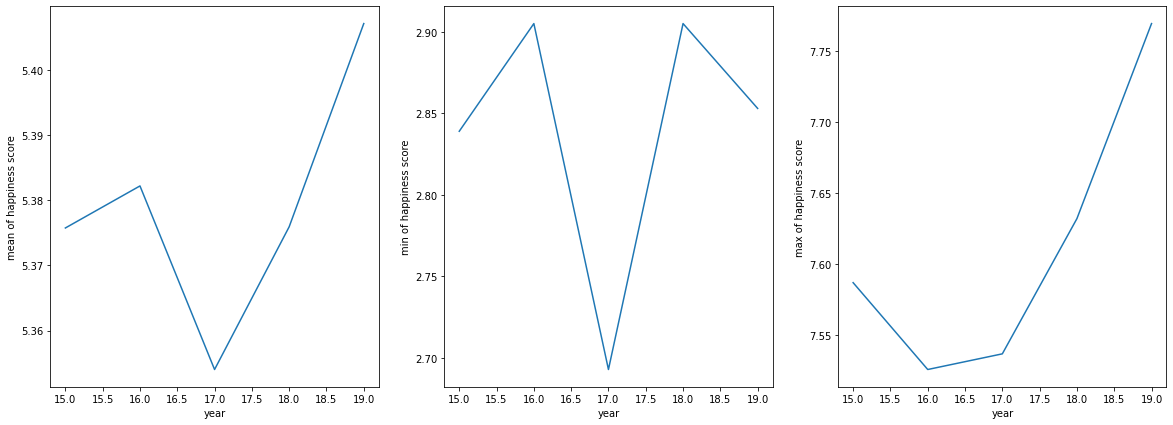

In [ ]:
f = plt.figure(figsize=(20,7))
f.add_subplot(131)
plt.plot(index , mean)
plt.xlabel("year")
plt.ylabel("mean of happiness score")

f.add_subplot(132)
plt.plot(index , minimum)
plt.xlabel("year")
plt.ylabel("min of happiness score")


f.add_subplot(133)
plt.plot(index , maximum)
plt.xlabel("year")
plt.ylabel("max of happiness score")

Text(0, 0.5, 'happiness score 2019')

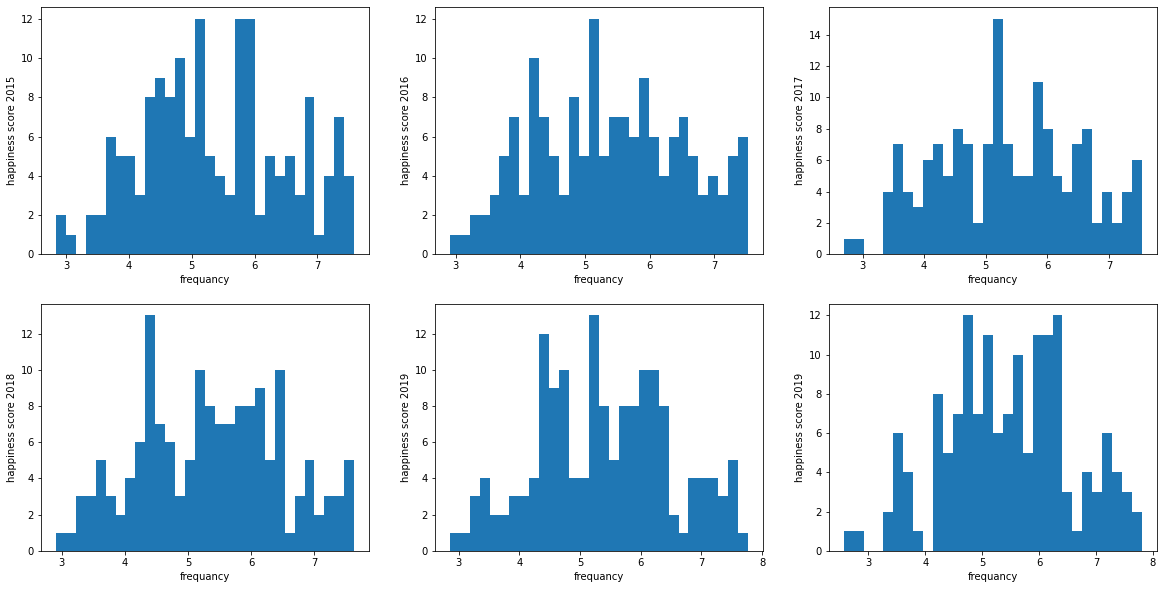

In [ ]:

f = plt.figure(figsize=(20,10))
f.add_subplot(231)
data15_new['Happiness Score'].plot.hist(bins=30)
plt.xlabel("frequancy")
plt.ylabel("happiness score 2015")

f.add_subplot(232)
data16_new['Happiness Score'].plot.hist(bins=30)
plt.xlabel("frequancy")
plt.ylabel("happiness score 2016")

f.add_subplot(233)
data17_new['Happiness Score'].plot.hist(bins=30)
plt.xlabel("frequancy")
plt.ylabel("happiness score 2017")

f.add_subplot(234)
data18_new['Happiness Score'].plot.hist(bins=30)
plt.xlabel("frequancy")
plt.ylabel("happiness score 2018")

f.add_subplot(235)
data19_new['Happiness Score'].plot.hist(bins=30)
plt.xlabel("frequancy")
plt.ylabel("happiness score 2019")

f.add_subplot(236)
data20['Ladder score'].plot.hist(bins=30)
plt.xlabel("frequancy")
plt.ylabel("happiness score 2019")


[None, None, None, None, None, None, None, None]

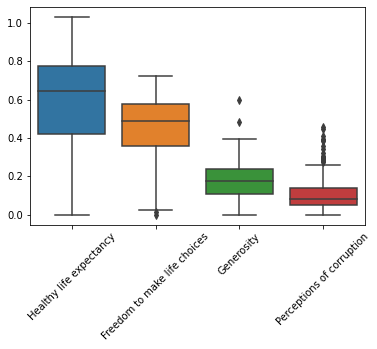

In [ ]:
x = sns.boxplot(data=happiness_report_18[['Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])

plt.setp(x.get_xticklabels(), rotation=45)



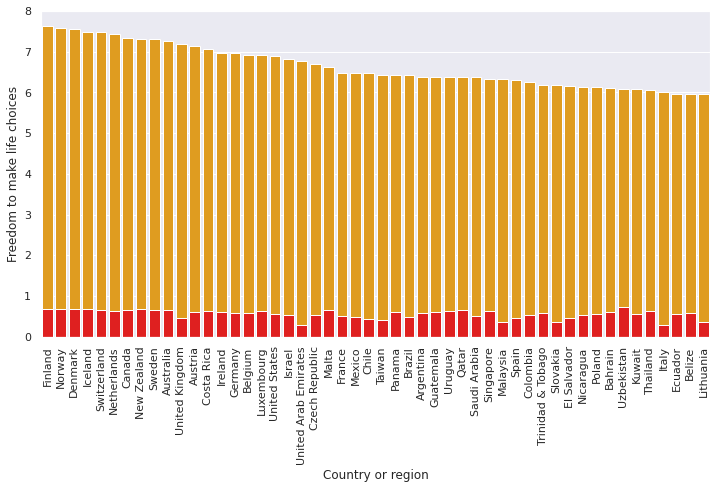

In [ ]:
df_temp = happiness_report_18.set_index('Country or region')
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Country or region', y='Score', data=happiness_report_18, 
            order=df_temp['Score'].sort_values(ascending=False).index[:50], color='orange')
sns.barplot(x='Country or region', y='Freedom to make life choices', data=happiness_report_18, 
            order=df_temp['Score'].sort_values(ascending=False).index[:50], color='red')
plt.xticks(rotation=90)
plt.show()

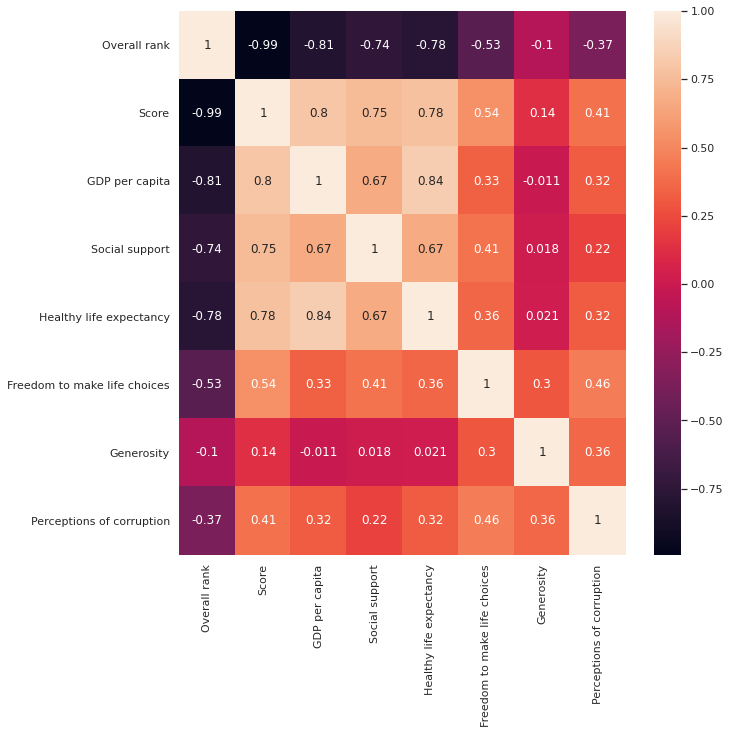

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(happiness_report_18.corr(), annot=True)

## Happiness score prediction 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



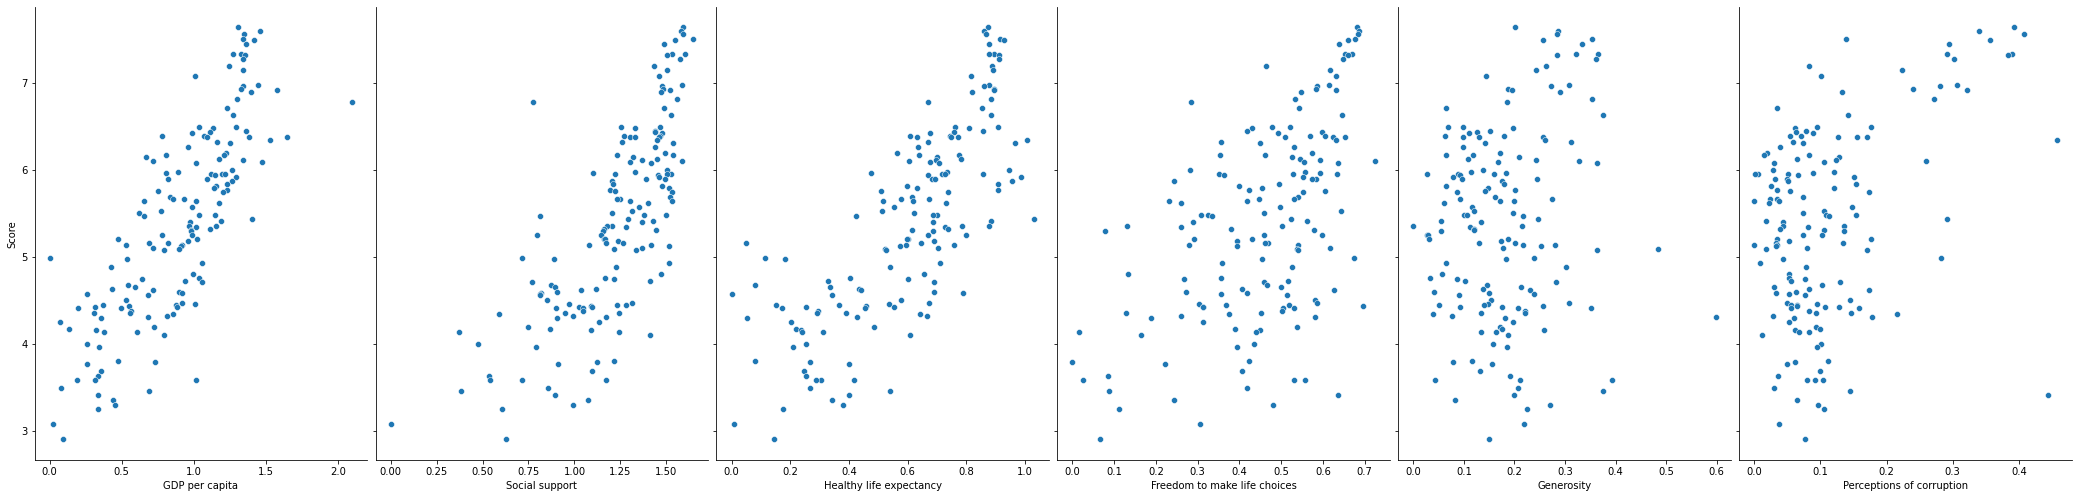

In [ ]:
# plot between each feature and the score of happiness 

sns.pairplot(data18, x_vars=[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], y_vars='Score', size=7, aspect=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



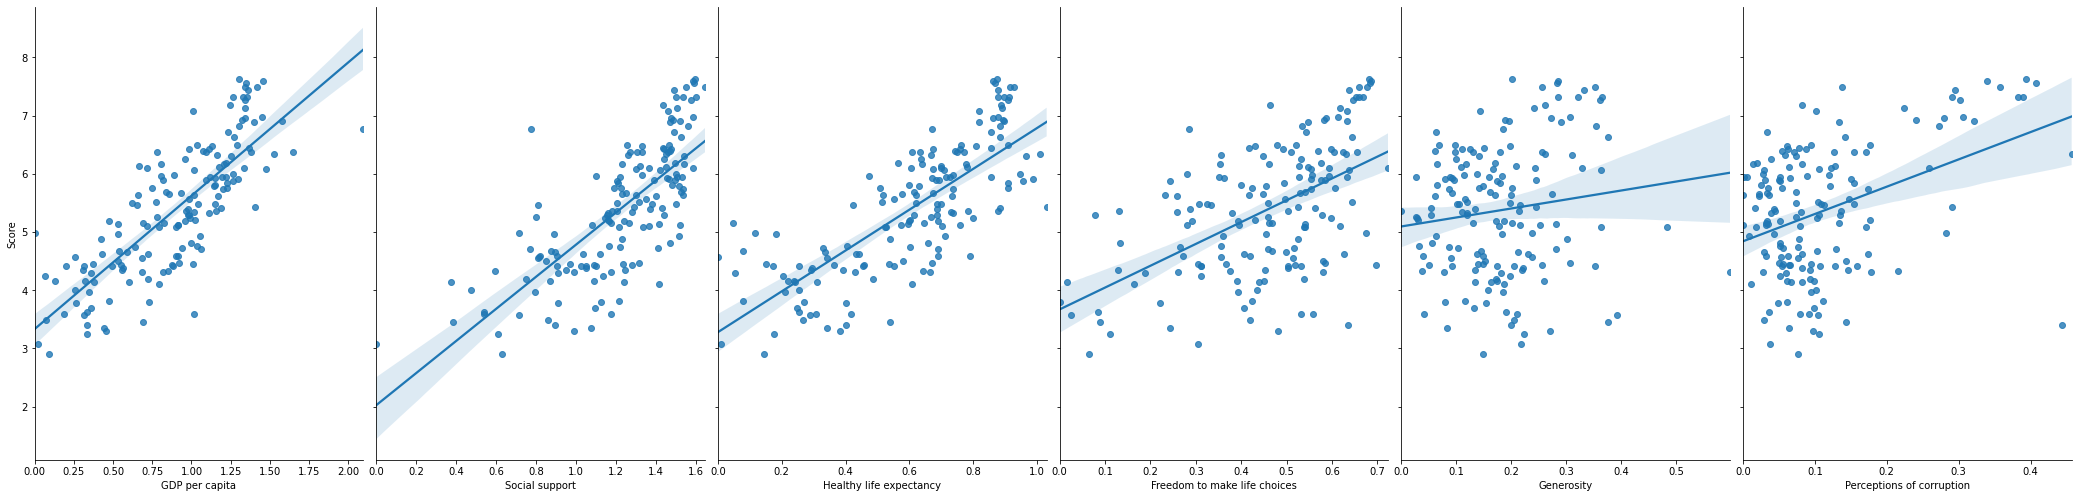

In [ ]:
sns.pairplot(data18, x_vars=[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], y_vars='Score', size=7, aspect=0.7, kind='reg')

### Regression on 2018 data

In [ ]:
X = data18[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

Y = data18['Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 

In [ ]:
#LinearRegression 


linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

print('Intercept: \n', linear_model.intercept_)
print('Coefficients: \n', linear_model.coef_)


Intercept: 
 1.8983328248672717
Coefficients: 
 [1.1949576  1.02714159 0.7135035  1.35573461 0.33732637 0.73463732]


In [ ]:
y_pred = linear_model.predict(X_test) 

In [ ]:
# calculate MAE, MSE, RMSE


print("MAE: ",metrics.mean_absolute_error(Y_test, y_pred))
print("MSE: ",metrics.mean_squared_error(Y_test, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE:  0.3677699338313385
MSE:  0.25191634399020923
RMSE:  0.5019126856239133


### PCA on 2018 data

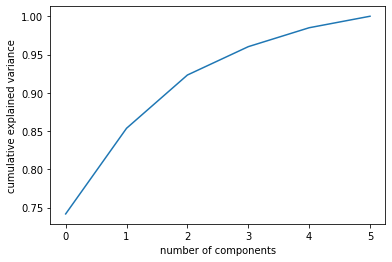

In [ ]:
pca = PCA().fit(data18[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


# the graph shows that 5 components describe all the data

In [ ]:
#LinearRegression after PCA

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(data18[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])

principal_Df= pd.DataFrame(data = principalComponents)

principal_Df.head()

,0,1,2,3,4
0,-0.661616,-0.123111,-0.183424,-0.002276,0.052646
1,-0.759738,-0.048702,-0.196622,0.077601,0.097512
2,-0.693412,-0.105879,-0.217159,0.023536,0.123164
3,-0.716636,-0.145386,-0.126773,-0.018257,0.074185
4,-0.743240,-0.020226,-0.187843,-0.001904,0.085300


In [ ]:
x = principal_Df

y = data18['Score']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2) 
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

print('Intercept: \n', linear_model.intercept_)
print('Coefficients: \n', linear_model.coef_)


Intercept: 
 5.383425109434959
Coefficients: 
 [-1.88711804 -0.59852862 -1.47091872 -0.27085081  0.14543616]


In [ ]:
y_pred = linear_model.predict(X_test) 

In [ ]:
# calculate MAE, MSE, RMSE


print("MAE: ",metrics.mean_absolute_error(Y_test, y_pred))
print("MSE: ",metrics.mean_squared_error(Y_test, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE:  0.403390271233293
MSE:  0.30465340738981517
RMSE:  0.5519541714579347


### Regression on all the data to predict 2020 sores 

In [ ]:
X = all_reports[[ 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

Y = all_reports['Happiness Score']


In [ ]:
#LinearRegression 


linear_model = LinearRegression()
linear_model.fit(X, Y)

print('Intercept: \n', linear_model.intercept_)
print('Coefficients: \n', linear_model.coef_)


Intercept: 
 2.1775373541929692
Coefficients: 
 [1.14712408 0.64089294 1.00368924 1.47930053 0.85265212 0.59378111]


In [ ]:
y_pred_train = linear_model.predict(X) 

print("MAE: ",metrics.mean_absolute_error(Y, y_pred_train))
print("MSE: ",metrics.mean_squared_error(Y, y_pred_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y, y_pred_train)))

MAE:  0.42615010312513685
MSE:  0.2995721073291361
RMSE:  0.5473318073428002


In [ ]:
score20 = linear_model.predict(data20_new[[ 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]) 

score20

array([7.05968332, 7.19645226, 7.19896173, 7.01321643, 7.31388168,
       7.05248891, 7.10395204, 7.11114356, 6.89859624, 7.151523  ,
       7.0366525 , 7.05319211, 6.82520551, 6.35005846, 6.24150737,
       7.12239187, 6.78602594, 6.58639855, 6.18484504, 6.53349044,
       6.73206104, 6.80658093, 6.62182256, 5.91285196, 6.31853327,
       6.30201082, 6.31287756, 6.37685495, 5.59559536, 6.09622534,
       7.48136376, 5.79710374, 6.54712223, 5.47443951, 5.60049039,
       6.16218233, 6.02310843, 6.09533274, 5.94010079, 6.53159514,
       5.98659966, 6.02935473, 6.22967835, 5.78851079, 6.19374798,
       5.61271775, 5.85590142, 6.40770746, 6.1265415 , 6.01935925,
       6.42190677, 5.57718976, 5.87185884, 6.14551395, 5.95349409,
       5.48662956, 5.78294235, 5.74457252, 6.28749228, 5.67810054,
       5.92430458, 6.4702058 , 5.66981057, 5.71819701, 5.40723674,
       4.75630603, 5.86751889, 5.89983597, 5.42909708, 5.19042188,
       5.25457417, 5.61054993, 5.7256201 , 5.42296761, 5.63925

In [ ]:
predicted20 = data20_new.copy()
predicted20["Happiness score"]=score20

predicted20.head()

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness score
0,Finland,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,7.059683
1,Denmark,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,7.196452
2,Switzerland,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,7.198962
3,Iceland,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,7.013216
4,Norway,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,7.313882


In [ ]:
predicted20 = predicted20.sort_values(by="Happiness score", ascending=False)
predicted20.head()

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness score
30,Singapore,1.519580,1.395457,1.137814,0.635317,0.533162,0.218771,7.481364
4,Norway,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,7.313882
2,Switzerland,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,7.198962
1,Denmark,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,7.196452
9,Luxembourg,1.536676,1.387528,0.986443,0.610137,0.367041,0.195954,7.151523


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

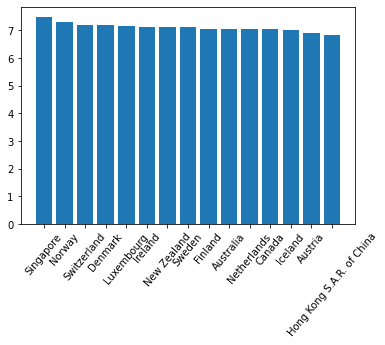

In [ ]:

countries = predicted20['Country'].iloc[:15]
scores =  predicted20["Happiness score"].iloc[:15]

plt.bar(countries,scores )
plt.xticks(rotation = 50)

In [ ]:
# evaluating 2020 data

print("MAE: ",metrics.mean_absolute_error(score20, data20['Ladder score']))
print("MSE: ",metrics.mean_squared_error(score20, data20['Ladder score']))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(score20, data20['Ladder score'])))

MAE:  0.4411971611174471
MSE:  0.3211340093005292
RMSE:  0.5666868705912721


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

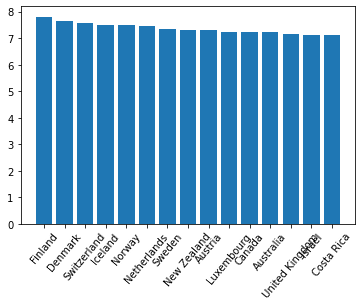

In [ ]:
data = data20.sort_values(by='Ladder score', ascending=False)


countries = data['Country name'].iloc[:15]
scores =  data['Ladder score'].iloc[:15]

plt.bar(countries,scores )
plt.xticks(rotation = 50)

## The effect of covid 19 on the happiness score 

In [250]:
covid_final['country']

location
Afghanistan    Afghanistan
Albania            Albania
Algeria            Algeria
Andorra            Andorra
Angola              Angola
                  ...     
Vietnam            Vietnam
World                World
Yemen                Yemen
Zambia              Zambia
Zimbabwe          Zimbabwe
Name: country, Length: 192, dtype: object

In [274]:
covid_final = covid_final.drop(labels=["World"])

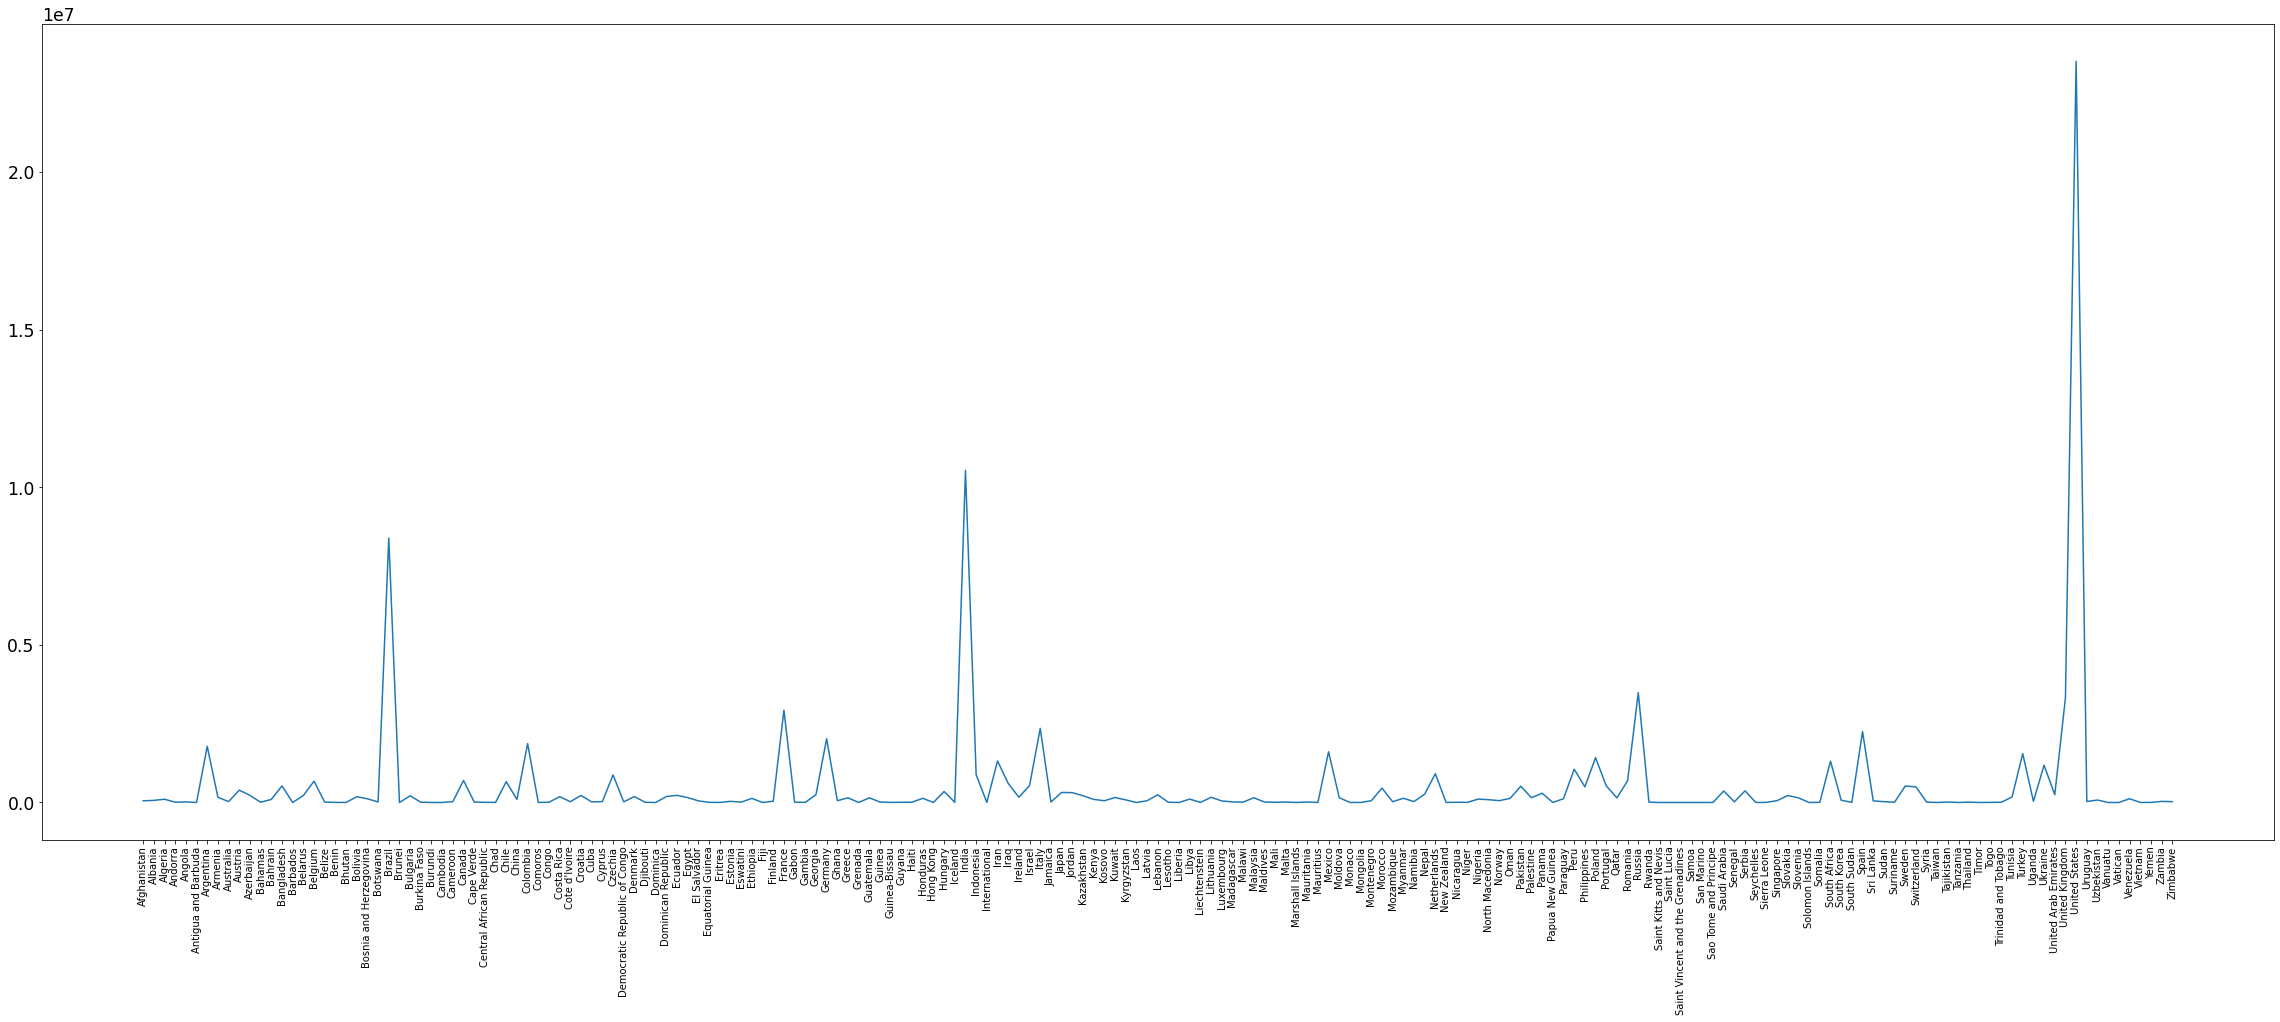

In [275]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (40, 15),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          }

plt.xticks(rotation=90, fontsize=10)
plt.rcParams.update(params)
plt.plot(covid_final['country'], covid_final['total_cases'])


In [276]:
sorted_covid = covid_final.sort_values(by="total_cases")
least_ten = sorted_covid.iloc[0:10,:]

<BarContainer object of 10 artists>

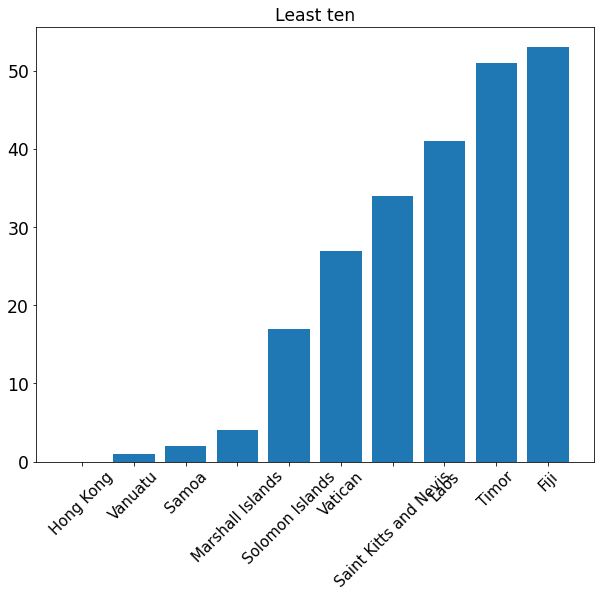

In [287]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (5, 2),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          }

plt.title("Least ten")
plt.xticks(rotation=45, fontsize=15)
plt.rcParams.update(params)
plt.bar(least_ten['country'], least_ten['total_cases'])

In [283]:
top_ten = sorted_covid.iloc[-10:,:]

<BarContainer object of 10 artists>

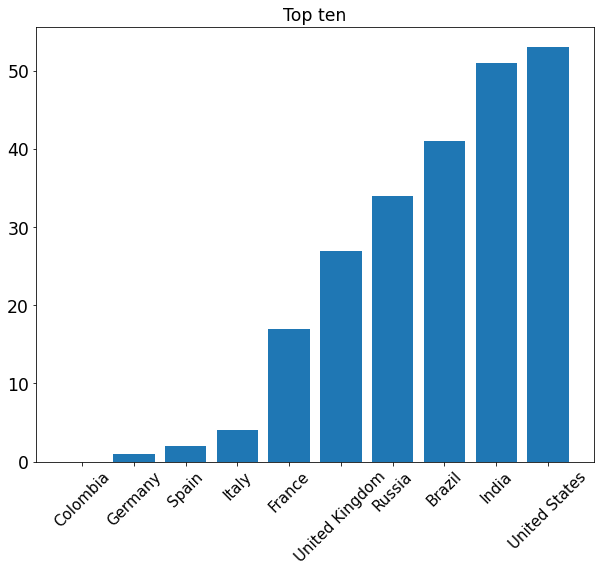

In [289]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          }

plt.title("Top ten")
plt.xticks(rotation=45, fontsize=15)
plt.rcParams.update(params)
plt.bar(top_ten['country'], least_ten['total_cases'])